In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

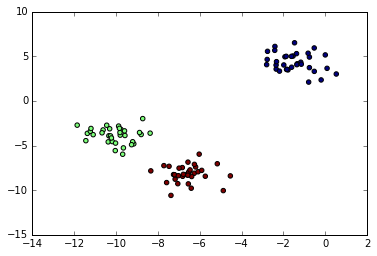

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y)

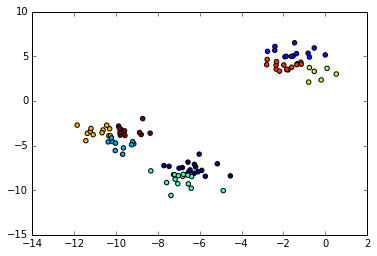

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)

In [5]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, km.labels_)

0.36237054852731548

In [7]:
km = KMeans(n_clusters=2).fit(X)
silhouette_score(X, km.labels_)

0.76582495176628351

In [9]:
scores = []
for n_clusters in range(2,10):
    km = KMeans(n_clusters=n_clusters).fit(X)
    scores.append(silhouette_score(X, km.labels_))

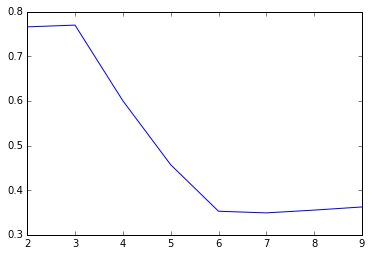

In [10]:
plt.plot(range(2,10), scores)

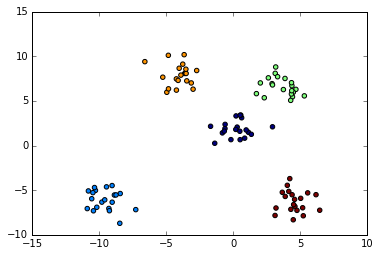

In [12]:
X, y = make_blobs(random_state=101, centers=5)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [13]:
scores = []
for n_clusters in range(2,10):
    km = KMeans(n_clusters=n_clusters).fit(X)
    scores.append(silhouette_score(X, km.labels_))

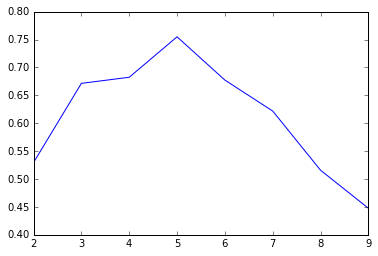

In [14]:
plt.plot(range(2,10), scores)

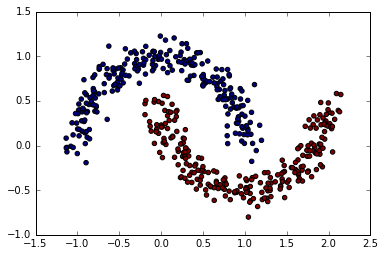

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

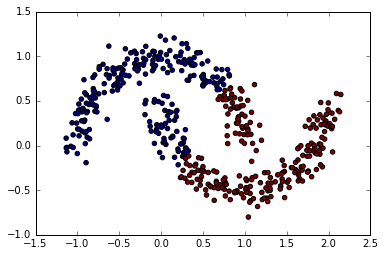

In [16]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(gamma=1, n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=sc.labels_)

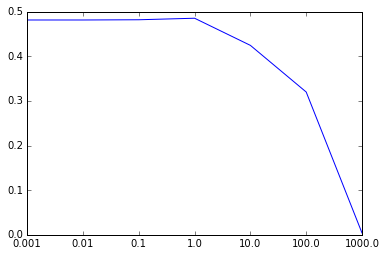

In [17]:
scores = []
for gamma in np.logspace(-3,3,7):
    sc = SpectralClustering(n_clusters=2, gamma=gamma).fit(X)
    scores.append(silhouette_score(X, sc.labels_))
plt.plot(scores)
plt.xticks(range(len(scores)), np.logspace(-3,3,7));

In [18]:
## Gamma= 1 appears to be best using silhouette_score but it isn't in real

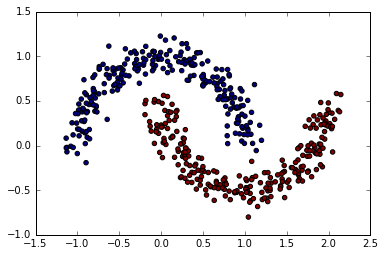

In [19]:
sc = SpectralClustering(gamma=50, n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = sc.labels_)

In [21]:
from sklearn.metrics import adjusted_rand_score

scores_ari = []
for gamma in np.logspace(-3,3,7):
    sc = SpectralClustering(n_clusters=2, gamma=gamma).fit(X)
    scores_ari.append(adjusted_rand_score(sc.labels_,y))

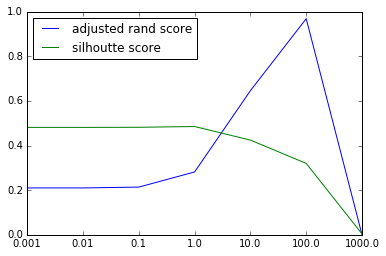

In [23]:
plt.plot(scores_ari, label="adjusted rand score")
plt.plot(scores, label="silhoutte score")
plt.xticks(range(len(scores)), np.logspace(-3,3,7))
plt.legend(loc="best")

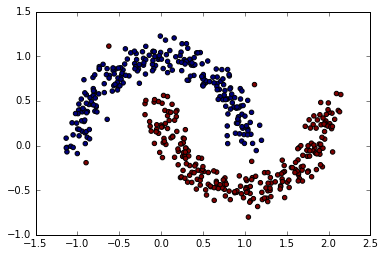

In [24]:
sc = SpectralClustering(gamma=100, n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = sc.labels_)